In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import cartopy.feature as cfeature
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool
import matplotlib.pyplot as plt
import time
import importlib
import stormcoupling as sc
import glob
from scipy import stats
import scipy
from geopy import distance
from scipy import interpolate
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import cm
import xlrd
import csv
import os
import math
import matplotlib.colors
import metpy
from metpy.interpolate import interpolate_to_isosurface
from metpy.calc import dewpoint_from_specific_humidity
from metpy.calc import equivalent_potential_temperature
from matplotlib.ticker import LogFormatterSciNotation
import matplotlib.patheffects as pe
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from metpy.units import units 
import metpy.calc as mpcalc
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import imageio.v2 as imageio
from PIL import Image, ImageOps
importlib.reload(sc)

<module 'stormcoupling' from '/lustre06/project/6084782/shared/gabe-fall-2025/TEtracking/stormcoupling.py'>

In [3]:
import plotter as pl
importlib.reload(pl)

<module 'plotter' from '/lustre06/project/6084782/shared/gabe-fall-2025/TEtracking/plotter.py'>

In [7]:
cyclone = pl.parse_te_tracks('/home/glach/projects/def-rfajber/shared/gabe-fall-2025/TEtracking/data/TEtextfiles/StitchNodes/NH/c_SN_f1.txt')

In [8]:
cyclone = cyclone[cyclone['length'] >= 12]

In [9]:
cyclone

id  length     lon    lat        msl                time
0        0      33   33.50  74.50   98168.19 2015-01-01 00:00:00
1        0      33   32.00  75.00   98266.81 2015-01-01 03:00:00
2        0      33   14.00  71.75   98055.44 2015-01-01 09:00:00
3        0      33   17.25  72.25   98053.12 2015-01-01 12:00:00
4        0      33    3.25  66.75   97602.88 2015-01-01 18:00:00
...    ...     ...     ...    ...        ...                 ...
12144  386      13 -178.50  37.50  101655.70 2015-04-30 09:00:00
12145  386      13 -177.75  37.75  101695.40 2015-04-30 12:00:00
12146  386      13 -176.50  38.25  101677.60 2015-04-30 15:00:00
12147  386      13 -175.25  38.75  101777.60 2015-04-30 18:00:00
12148  386      13 -174.00  39.25  101856.30 2015-04-30 21:00:00

[11495 rows x 6 columns]

In [11]:
anticyclone_2 = pl.parse_te_tracks('/home/glach/projects/def-rfajber/shared/gabe-fall-2025/TEtracking/data/TEtextfiles/StitchNodes/NH/ac_SN_f1.txt')

In [12]:
anticyclone_2 = anticyclone_2[anticyclone_2['length'] >= 12]

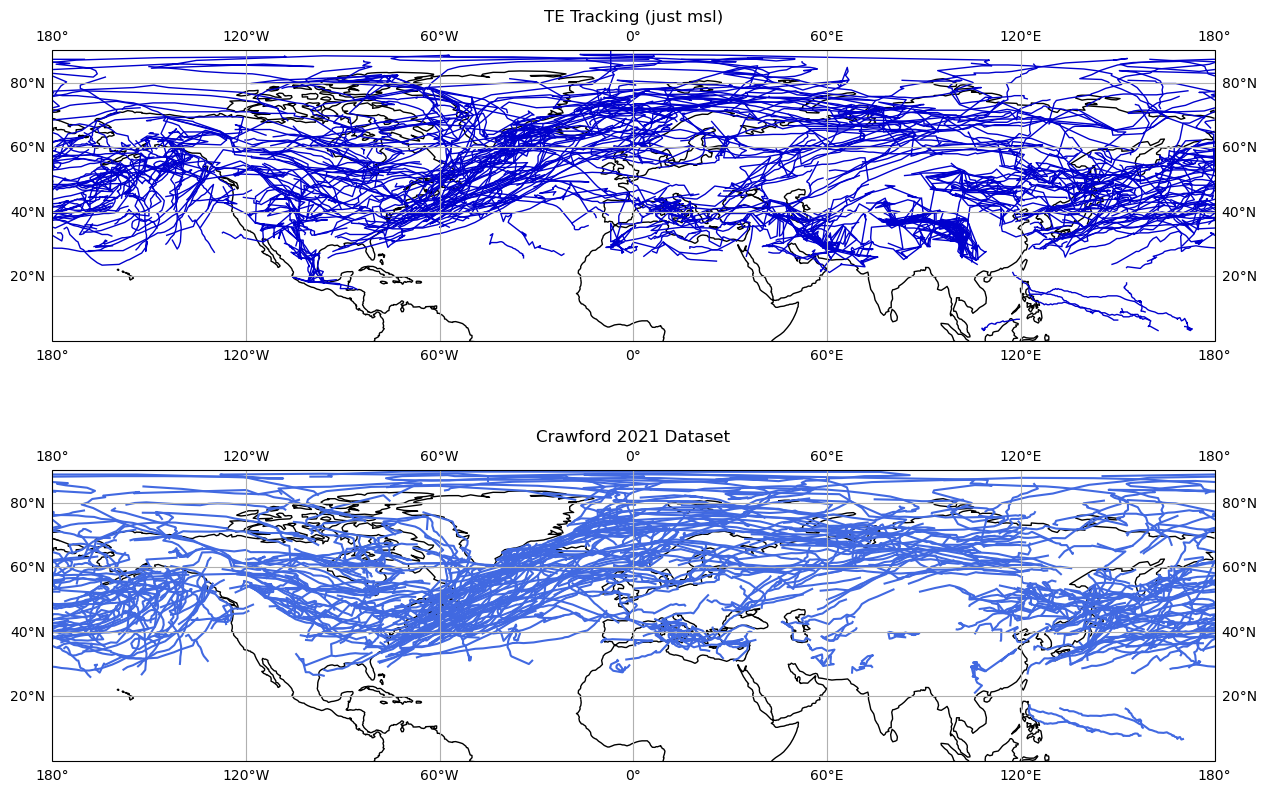

In [7]:
defaultSYN = '/home/glach/projects/def-rfajber/shared/tracks-gabe/SYN_Tracks.csv'
syns = pd.read_csv(defaultSYN)

fig, axes = plt.subplots(
    nrows=2, ncols=1,
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(15, 10)
)
axes[0].coastlines()
axes[0].gridlines(draw_labels=True)
axes[1].coastlines()
axes[1].gridlines(draw_labels=True)

# Plot each cyclone track
for tid, track in cyclone.groupby("id"):
    axes[0].plot(track["lon"], track["lat"], linewidth=1, transform=ccrs.Geodetic(), c='mediumblue')
for path in syns.path:
    syn = pd.read_csv(path)
    if(syn.year[0] == 2015):
        month = int(syn.month[0])
        if(1 <= month <= 4):
            #print('hi')
            axes[1].plot(syn.lon, syn.lat, c='royalblue', transform=ccrs.Geodetic())
    
axes[0].set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())
axes[1].set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())
axes[0].set_title('TE Tracking (just msl)')
axes[1].set_title('Crawford 2021 Dataset')
#plt.subplots_adjust(hspace=0.1)
#plt.savefig('test.jpg', bbox_inches='tight')
plt.savefig('cyclones.png', bbox_inches='tight')
plt.show()

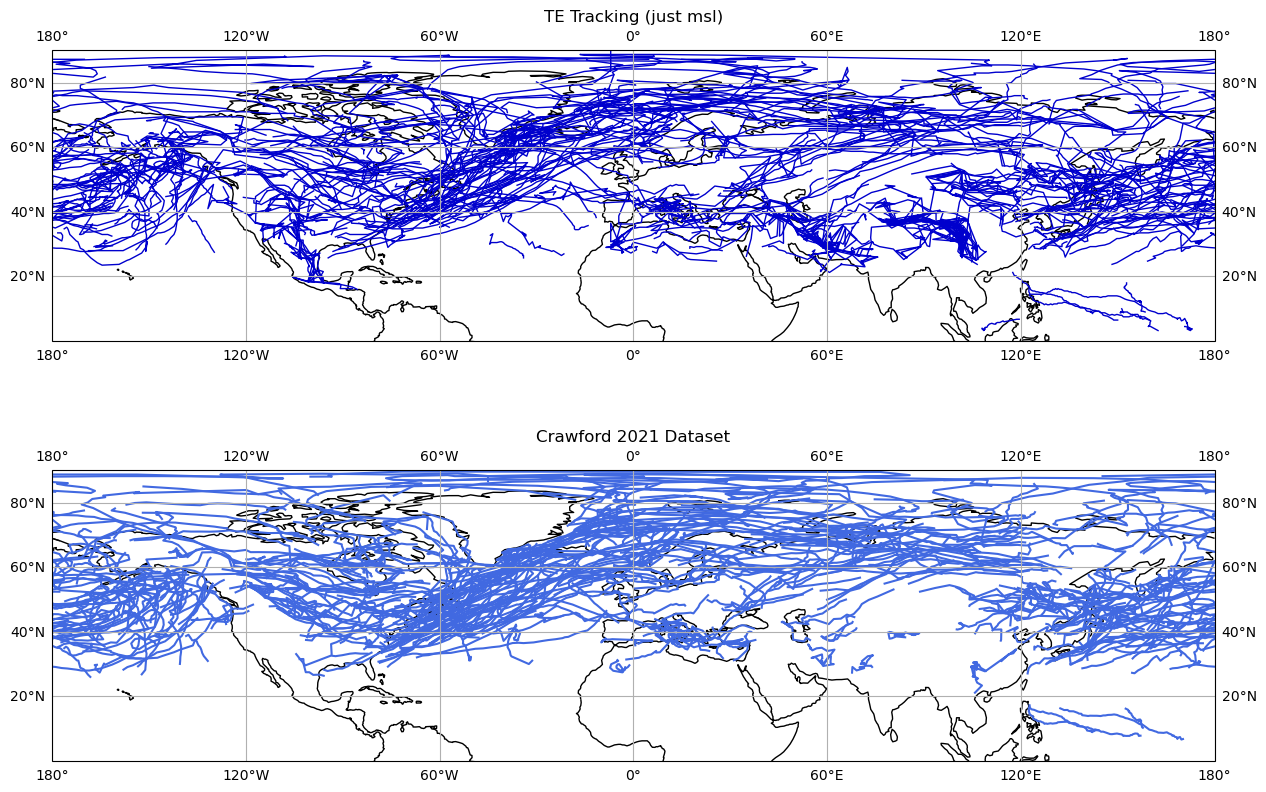

In [21]:
defaultSYN = '/home/glach/projects/def-rfajber/shared/tracks-gabe/SYN_Tracks.csv'
syns = pd.read_csv(defaultSYN)

fig, axes = plt.subplots(
    nrows=2, ncols=1,
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(15, 10)
)
axes[0].coastlines()
axes[0].gridlines(draw_labels=True)
axes[1].coastlines()
axes[1].gridlines(draw_labels=True)

# Plot each cyclone track
for tid, track in cyclone_filtered.groupby("id"):
    axes[0].plot(track["lon"], track["lat"], linewidth=1, transform=ccrs.Geodetic(), c='mediumblue')
for path in syns.path:
    syn = pd.read_csv(path)
    if(syn.year[0] == 2015):
        month = int(syn.month[0])
        if(1 <= month <= 4):
            #print('hi')
            axes[1].plot(syn.lon, syn.lat, c='royalblue', transform=ccrs.Geodetic())
    
axes[0].set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())
axes[1].set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree())
axes[0].set_title('TE Tracking (just msl)')
axes[1].set_title('Crawford 2021 Dataset')
#plt.subplots_adjust(hspace=0.1)
#plt.savefig('test.jpg', bbox_inches='tight')
plt.savefig('cyclones.png', bbox_inches='tight')
plt.show()

In [18]:
msl = (xr.open_dataset('data/era5-raw/NH/msl.nc'))

In [21]:
anticyclone_2 = pl.parse_te_tracks('/home/glach/projects/def-rfajber/shared/gabe-fall-2025/TEtracking/data/TEtextfiles/StitchNodes/NH/anticyclone_SN_msl_200_real_15deg.txt')
data_apr_01_12z_2 = pl.findDataAtTime2('2015', '04', '01', '12', 'msl', cyclone, anticyclone_2, msl)
data_apr_01_12z_msl_tp_2 = pl.findDataAtTime2('2015', '04', '01', '12', 'tp', cyclone, anticyclone_2, tp)

In [14]:
anticyclone_2

id  length     lon    lat       msl                time
0        0      45 -158.75  78.75  104347.7 2015-01-01 00:00:00
1        0      45 -163.75  79.25  104244.6 2015-01-01 03:00:00
2        0      45 -156.25  78.00  104243.1 2015-01-01 06:00:00
3        0      45 -155.00  78.25  104190.7 2015-01-01 09:00:00
4        0      45 -151.00  77.00  104225.4 2015-01-01 12:00:00
...    ...     ...     ...    ...       ...                 ...
10373  288      12 -100.00  24.25  101734.7 2015-04-30 09:00:00
10374  288      12  -97.25  19.00  101848.4 2015-04-30 12:00:00
10375  288      12  -96.50  17.50  101976.4 2015-04-30 15:00:00
10376  288      12  -91.25  15.50  101825.4 2015-04-30 18:00:00
10377  288      12  -97.25  19.00  101669.1 2015-04-30 21:00:00

[10378 rows x 6 columns]

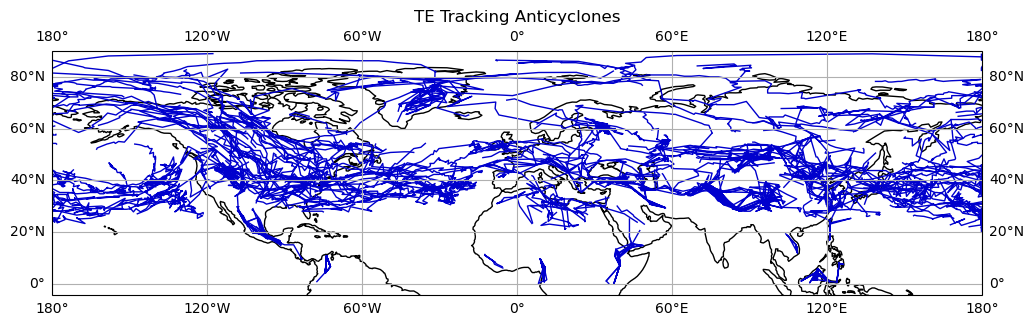

In [8]:
## uses geopotential data, didnt work

fig=plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)

# Plot each cyclone track
for tid, track in anticyclone_2.groupby("id"):
    ax.plot(track["lon"], track["lat"], linewidth=1, transform=ccrs.Geodetic(), c='mediumblue')
#ax.set_extent([-175, -30, 20, 75], crs=ccrs.PlateCarree())
ax.set_title('TE Tracking Anticyclones')
plt.savefig('anticyclones.jpg', bbox_inches='tight')
plt.show()

In [ ]:
data_apr_02_15z_2 = pl.findDataAtTime2('2015', '04', '02', '15', 'msl', cyclone, anticyclone_2, msl)

In [20]:
tp = (xr.open_dataset('data/era5-raw/NH/tp.nc'))

In [28]:
vo_700 = (xr.open_dataset('data/era5-raw/NH/vo_700.nc'))

In [29]:
vo_300 = (xr.open_dataset('data/era5-raw/NH/vo_300.nc'))

In [3]:
z_500 = (xr.open_dataset('data/era5-raw/NH/z_500.nc'))

In [12]:
april_2015 = z_500.sel(valid_time=slice("2015-03-01", "2015-04-30"))

In [13]:
april_mean = april_2015.mean('valid_time')

In [14]:
april_2015_anomaly = april_2015 - april_mean

In [15]:
april_2015_anomaly['z'].attrs['units'] = z_500.z.units

In [30]:
u_v_300 = (xr.open_dataset('data/era5-raw/NH/u_v_300.nc'))

In [31]:
ds = u_v_300.sel(valid_time=slice("2015-04-01", "2015-04-04"))

In [32]:
ds["wind_speed"] = np.sqrt(ds["u"]**2 + ds["v"]**2)

In [33]:
ds["wind_speed"].attrs["units"] = "m/s"

In [34]:
data_apr_01_12z = pl.findDataAtTime2('2015', '04', '01', '12', 'msl', cyclone, anticyclone, msl)

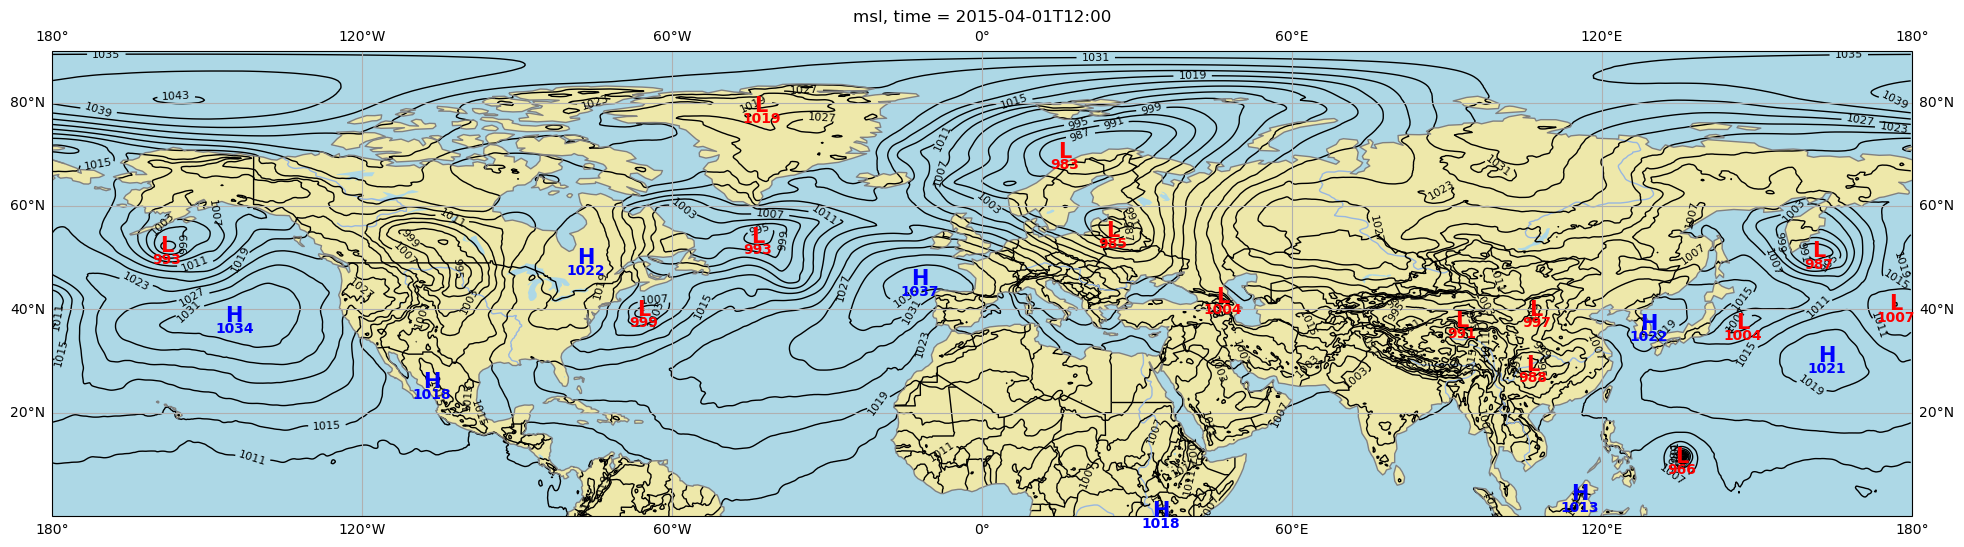

In [35]:
pl.plotMSLAtTime2(data_apr_01_12z_2, bounds=[-180, 180, 0, 90])

In [36]:
data_apr_01_12z_msl_tp = pl.findDataAtTime2('2015', '04', '01', '12', 'tp', cyclone, anticyclone, tp)

In [37]:
data_apr_01_12z_msl_vo_300 = pl.findDataAtTime2('2015', '04', '01', '12', 'vo', cyclone, anticyclone_2, vo_300)

In [38]:
data_apr_01_12z_msl_vo_700 = pl.findDataAtTime2('2015', '04', '01', '12', 'vo', cyclone, anticyclone_2, vo_700)

In [39]:
data_apr_01_12z_msl_z_500 = pl.findDataAtTime2('2015', '04', '01', '12', 'z', cyclone, anticyclone_2, z_500)

In [22]:
data_apr_01_12z_msl_z_500_anomaly = pl.findDataAtTime2('2015', '04', '01', '12', 'z', cyclone, anticyclone_2, april_2015_anomaly)

In [40]:
data_apr_01_12z_msl_wind_300 = pl.findDataAtTime2('2015', '04', '01', '12', 'wind_speed', cyclone, anticyclone_2, ds)

In [41]:
data_apr_02_15z_msl_wind_300 = pl.findDataAtTime2('2015', '04', '02', '15', 'wind_speed', cyclone, anticyclone_2, ds)

In [42]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_02_15z_2, data_apr_02_15z_msl_wind_300, 'turbo', vmin1=None, vmax1=None, bounds=[-180, 180, 0, 90], out='full_NH')

NameError: name 'data_apr_02_15z_2' is not defined

In [ ]:
base_cmap = plt.get_cmap('gist_ncar')
cmap_colors = base_cmap(np.arange(base_cmap.N))
cmap_colors[0, -1] = 0  
transparent_cmap = mcolors.ListedColormap(cmap_colors)

In [ ]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_01_12z_2, data_apr_01_12z_msl_tp_2, transparent_cmap, vmin1=None, vmax1=None, bounds=[-180, 180, 0, 90], out='full_NH')

In [ ]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_01_12z_2, data_apr_01_12z_msl_vo_300, 'PRGn', vmin1=-0.0004, vmax1=0.0004, bounds=[-180, 180, 0, 90], out='full_NH_300')

In [ ]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_01_12z_2, data_apr_01_12z_msl_vo_700, 'PRGn', vmin1=-0.0002, vmax1=0.0002, bounds=[-180, 180, 0, 90], out='full_NH_700')

In [ ]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_01_12z_2, data_apr_01_12z_msl_z_500, 'viridis', vmin1=None, vmax1=None, bounds=[-180, 180, 0, 90], out='full_NH')

Pressure level data found, defaulting to 500.0


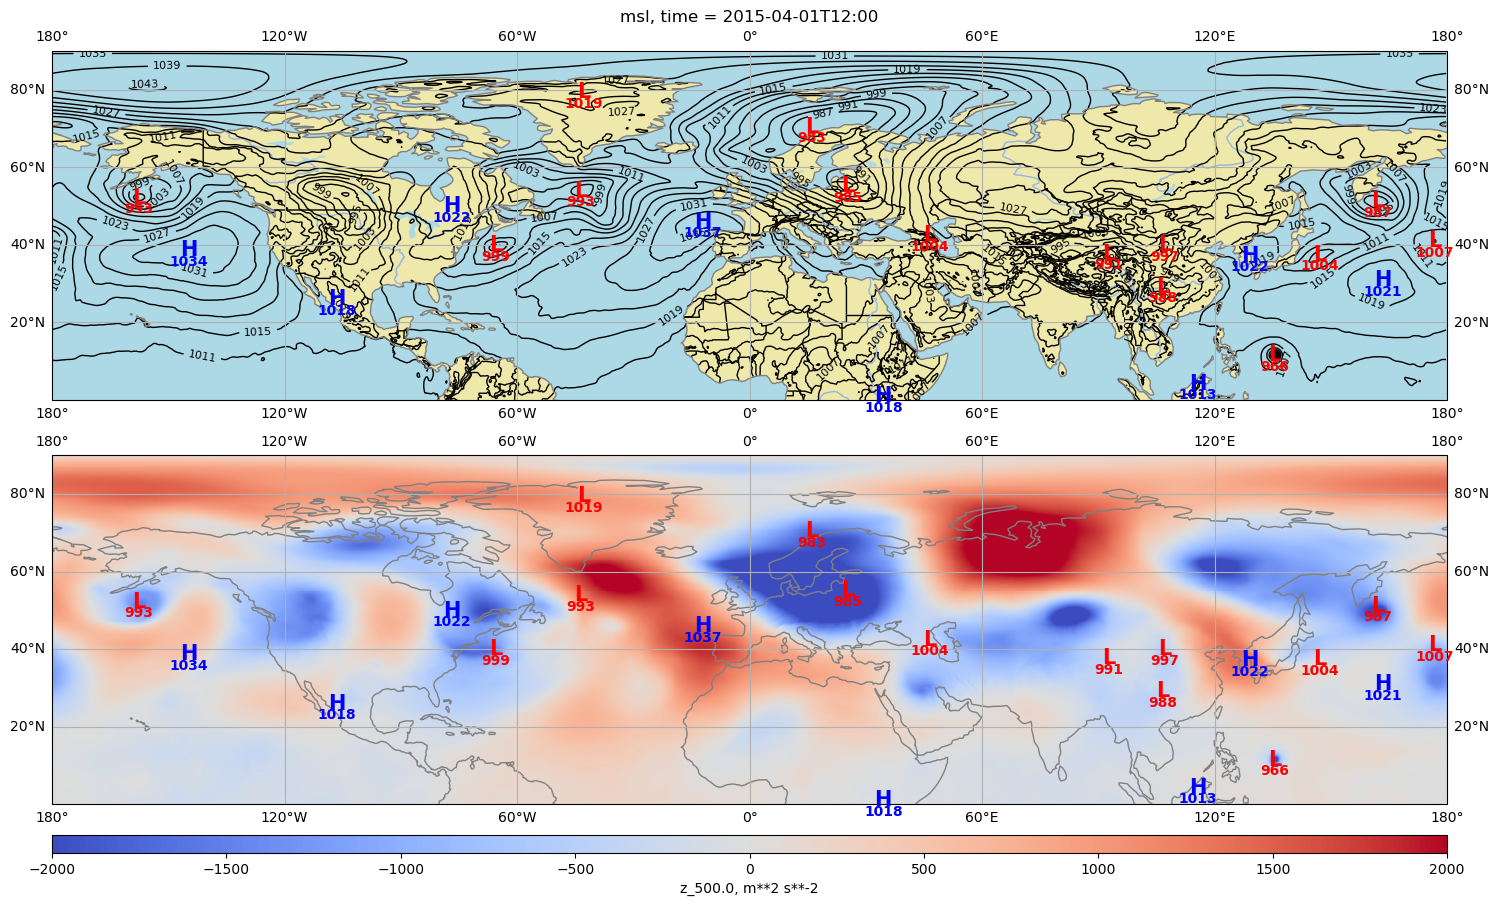

In [23]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_01_12z_2, data_apr_01_12z_msl_z_500_anomaly, 'coolwarm', vmin1=-2000, vmax1=2000, bounds=[-180, 180, 0, 90], out='full_NH_anomaly')

In [ ]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_01_12z_2, data_apr_01_12z_msl_wind_300, 'turbo', vmin1=None, vmax1=None, bounds=[-180, 180, 0, 90], out='full_NH')

In [ ]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_01_12z_2, data_apr_01_12z_msl_tp_2, transparent_cmap, vmin1=None, vmax1=None, bounds=[75, 180, 0, 60], out='kuro', hspace=0.1)

In [ ]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_01_12z_2, data_apr_01_12z_msl_tp_2, transparent_cmap, vmin1=None, vmax1=None, bounds=[-30, 60, 30, 80], out='EU', hspace=0.1)

In [ ]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_01_12z_2, data_apr_01_12z_msl_tp_2, transparent_cmap, vmin1=None, vmax1=None, bounds=[30, 180, 0, 90], out='Asia', hspace=0.1)

In [ ]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_01_12z_2, data_apr_01_12z_msl_vo_300, 'PRGn', vmin1=-0.0004, vmax1=0.0004, bounds=[30, 180, 0, 90], out='Asia', hspace=0.1)

In [ ]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_01_12z_2, data_apr_01_12z_msl_tp_2, transparent_cmap, vmin1=None, vmax1=None, out='NA', hspace=0.1)

In [ ]:
start1 = pd.Timestamp("2015-04-01 00:00:00")

In [ ]:
end1 = pd.Timestamp("2015-04-04 00:00:00")

In [ ]:
pl.createGifFrames_twopanel(start1, end1, cyclone, anticyclone_2, msl, tp, 'tp', transparent_cmap, bounds=[-180, 180, 0, 90], vmin1=0, vmax1=0.025, out='NH')

In [ ]:
pl.createGifFrames_twopanel(start1, end1, cyclone, anticyclone_2, msl, vo_300, 'vo', 'PRGn', bounds=[-180, 180, 0, 90], vmin1=-0.0004, vmax1=0.0004, out='NH_gif_2_vort_300')

In [ ]:
pl.createGifFrames_twopanel(start1, end1, cyclone, anticyclone_2, msl, ds, 'wind_speed', 'turbo', bounds=[-180, 180, 0, 90], vmin1=0, vmax1=80, out='NH_gif_2')

In [103]:
## creates gif from frames

folder = "plots/random/frames_jetstream"
output_gif = "animation_NH_new_jetstream.gif"

images = sorted(
    [img for img in os.listdir(folder) if img.endswith((".png", ".jpg"))]
)

frames = []
for img_name in images:
    img_path = os.path.join(folder, img_name)
    frames.append(imageio.imread(img_path))

imageio.mimsave(output_gif, frames, duration=500, loop=0)

print("✅ GIF saved as", output_gif)

✅ GIF saved as animation_NH_new_jetstream.gif


In [ ]:
## helper function to make frames format fit ffmpeg expected style (proper aspect ratio)

def make_even(im):
    w, h = im.size
    new_w = w + (w % 2)
    new_h = h + (h % 2)
    return ImageOps.pad(im, (new_w, new_h))

In [ ]:
## make mp4 (instead of gif)


folder = "plots/random/frames_NH_apr1_4"
output_mp4 = "animation_mp4_NH_new.mp4"

images = sorted([img for img in os.listdir(folder) if img.endswith(".png")])
frames = []

for img_name in images:
    path = os.path.join(folder, img_name)
    im = Image.open(path)
    im = make_even(im)
    im = im.convert("RGB")       
    frames.append(np.array(im))  

imageio.mimsave(output_mp4, frames, fps=5)

In [ ]:
pl.plotMSLAndGradAtTime_twopanel(data_apr_01_12z_2, data_apr_01_12z_msl_tp_2, transparent_cmap, vmin1=None, vmax1=None, bounds=[-180, 180, 0, 90], out='full_NH_15degAC')